In [241]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

In [242]:
df =pd.read_excel('Online Retail.xlsx')

In [243]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [245]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## Data Cleaning 
        
        1) Dropping NaN Values
        2) Dropping Duplicates 

In [246]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [247]:
((df.isna().sum()/df.shape[0])*100).round(2)# This will give the % of nan values

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

##### Even if the NaN values comes to 25% in Customer Id , filling it with any value is meaning less cos we are trying to find potential customer and Customer Id is the Unique Identification

In [248]:
df.dropna(subset='CustomerID', inplace=True)

In [249]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [250]:
df.duplicated().sum()# Checking for Duplicates 

5225

In [251]:
df.drop_duplicates(inplace=True)# Dropping Duplicates 

In [252]:
df.duplicated().sum()

0

## Feature  Examination

#### 1) InvoiceNo:  Invoice number. Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation

    Check for if there are any Cancelled transations in the data

In [253]:
df['InvoiceNo'].str.startswith('C').value_counts()

InvoiceNo
True    8872
Name: count, dtype: int64

#### As there are these much cancelled transcations we have to drop these values , We are only selecting those rows where there are no cancelled transations  

In [254]:
df= df[~df['InvoiceNo'].str.contains('C',case=False, na=False)] # The'~' sign will select the rows which does not contain the letter 'C'

#### 2) StockCode	Product (item) code. Nominal, a five digit integral number uniquely assigned to each distinct product
      
     This is the unique Identification number for the Products 

In [255]:
df['StockCode'].nunique()

3665

#### Description	Product (item) name. Nominal

#### 3) Quantity	The quantities of each product (item) per transaction. Numeric

In [256]:
df["Description"].nunique()

3877

In [257]:
df["Description"].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
Name: count, dtype: int64

#### 4) InvoiceDate	Invoice Date and time. Numeric, the day and time when each transaction was generated

#### 5) UnitPrice	Unit price. Numeric, product price per unit in sterling

#### 6) CustomerID	Customer number. Nominal, a six digit integral number uniquely assigned to each customer
    
        Out of 4373 Unique Customers we have to do the analysis

In [258]:
df['CustomerID'].nunique()

4339

#### 7) Country	Country name. Nominal, the name of the country where each customer resides

## Data Transformation:

 #### Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

    a. Create month cohorts and analyze active customers for each cohort.

    b. Analyze the retention rate of customers.

In [259]:
df.shape

(392732, 8)

#### For Analysing the Retention rate we have to divide the dat on the base of the month and then calculate the retention rate by dividing the retaining customers /number of customers of the first month

In [260]:
# Adding a column month showing which month the transaction happened
df['Month'] =df['InvoiceDate'].dt.month # Divide the data on the basis of month

In [261]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12


In [262]:
df.shape

(392732, 9)

### Calculating the Retentation rate for Customers on a monthly basis 

In [263]:
df1 =df.copy()

In [264]:
df1.shape

(392732, 9)

In [265]:
# Taking the Uniques Customers Visited the store  on each Month
retention_rate =df1.groupby('Month')['CustomerID'].agg(['count','nunique'])

In [266]:
retention_rate

,count,nunique
Month,,
1,20991,741
2,19707,758
3,26872,974
4,22435,856
5,28075,1056
6,26926,991
7,26582,949
8,26796,935
9,39671,1266


We are finding the same customers Visisted the Store on two consequetive Months

In [267]:
grouped=df1.groupby('Month')
l=[]
for i , df1 in grouped:
    l.append((df1['CustomerID']))
             

In [268]:
l2=[]
for i in range (0,(len(l)-1)):
    l2.append(l[i][l[i].isin(l[i+1])].nunique())

In [269]:
pd.Series(l2).reindex([0,1,2,3,4,5,6,7,8,9,10,11,12]).shift(2)

0       NaN
1       NaN
2     262.0
3     290.0
4     304.0
5     368.0
6     410.0
7     365.0
8     388.0
9     425.0
10    489.0
11    622.0
12    646.0
dtype: float64

In [270]:
retention_rate['monthly_ret'] = pd.Series(l2).reindex([0,1,2,3,4,5,6,7,8,9,10,11,12]).shift(2)

In [271]:
retention_rate.fillna(0, inplace=True)

In [272]:
retention_rate

,count,nunique,monthly_ret
Month,,,
1,20991,741,0.0
2,19707,758,262.0
3,26872,974,290.0
4,22435,856,304.0
5,28075,1056,368.0
6,26926,991,410.0
7,26582,949,365.0
8,26796,935,388.0
9,39671,1266,425.0


In [273]:
# Calculating the rate of customers visited the srtore in two consequitive months
retention_rate['% Retention'] = ((retention_rate['monthly_ret']/retention_rate['nunique'])*100).round(2)

In [274]:
retention_rate

,count,nunique,monthly_ret,% Retention
Month,,,,
1,20991,741,0.0,0.00
2,19707,758,262.0,34.56
3,26872,974,290.0,29.77
4,22435,856,304.0,35.51
5,28075,1056,368.0,34.85
6,26926,991,410.0,41.37
7,26582,949,365.0,38.46
8,26796,935,388.0,41.50
9,39671,1266,425.0,33.57


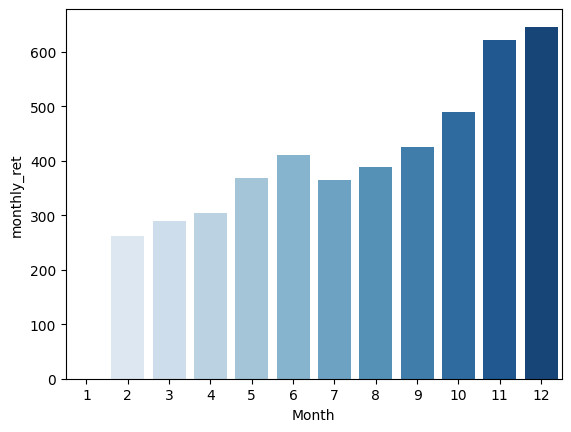

In [275]:
sns.barplot(data=retention_rate ,x=retention_rate.index,y='monthly_ret',palette='Blues');

# For doing RFM analysis we have to get the 'Recency','Frequency',and 'Monitory' Values for the data 
     
    * Recency = The Most Recent Customer , where the number of days since the customer visited the store should be minimum 
    * Frequency = How frequently a specific customer is visiting a store , this can be got by counting the unique Customer id for a given period 
    * Monetry  = This value is the How much a customer Spend totally when visiting the store 
    
All these values are Customer Specific , so we have to Group by Cusomer Id and take the Sum of the (Quantity*Price),Minimum of days since the specific customer visited the store , and the Number of times each Customer visited the store ( Count of the customer Id )

### To Find the Recency Value of the data 

In [276]:
df.shape

(392732, 9)

In [277]:
df['Recency_year'] = (df['InvoiceDate'].max()-df['InvoiceDate']).dt.days

In [278]:
df['Recency_year']

0         373
1         373
2         373
3         373
4         373
         ... 
541904      0
541905      0
541906      0
541907      0
541908      0
Name: Recency_year, Length: 392732, dtype: int64

### To find the Monetry Value of each Customer 

In [279]:
df[['Quantity','UnitPrice']]

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [280]:
df ['Monitory'] = df['Quantity']*df['UnitPrice']

In [281]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Recency_year,Monitory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,373,15.3


##  Perform descriptive analytics on the given data.

In [282]:
df[['Quantity','UnitPrice','Recency_year','Monitory']].describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,392732.0,13.153718,181.588420,1.0,1.00,1.00,1.00,2.00,6.00,12.00,24.00,36.0,120.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,0.21,0.42,0.55,1.25,1.95,3.75,6.35,8.5,14.95,8142.75
Recency_year,392732.0,151.202792,112.692207,0.0,1.00,9.00,18.00,49.00,131.00,246.00,321.00,359.0,371.00,373.00
Monitory,392732.0,22.629195,311.083465,0.0,0.55,1.25,2.08,4.95,12.39,19.80,35.40,67.5,203.52,168469.60


### Outlier Checking  for Continous Variable 

In [283]:
# Function for Checking Outliers 

for values in ["Quantity","UnitPrice","Monitory"]:

    Q1 = df[values].quantile(0.01)
    Q3 = df[values].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[values] > upper) | (df[values] < lower)].any(axis=None):
        print(values,"yes")
        print(df[(df[values] > upper) | (df[values] < lower)].shape[0])
    else:
        print(values, "no")

Quantity yes
961
UnitPrice yes
661
Monitory yes
901


### As we are not doing any Staticial Analysis ,The Distribution of the data not need to be of a conceren , so the Statical analysis is not important , hear we are not doing Dedicated EDA  or  outliers removal


In [285]:
df.shape

(392732, 11)

In [284]:
for cols in df :
    print(cols)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country
Month
Recency_year
Monitory


 # ** RFM Analysis

## Preparing the DATA 

In [286]:
rfm_model=df.groupby('CustomerID').agg({'CustomerID':'count','Recency_year':'min','Monitory':'sum'})

In [287]:
rfm_model

,CustomerID,Recency_year,Monitory
CustomerID,,,
12346.0,1,325,77183.60
12347.0,182,1,4310.00
12348.0,31,74,1797.24
12349.0,73,18,1757.55
12350.0,17,309,334.40
...,...,...,...
18280.0,10,277,180.60
18281.0,7,180,80.82
18282.0,12,7,178.05


In [288]:
rfm_model.rename(columns={'CustomerID': 'Frequency','Recency_year': 'Recency'}, inplace =True)

In [289]:
rfm_model.head()

,Frequency,Recency,Monitory
CustomerID,,,
12346.0,1,325,77183.60
12347.0,182,1,4310.00
12348.0,31,74,1797.24
12349.0,73,18,1757.55
12350.0,17,309,334.40


In [290]:
rfm_model['Q_Recency'] = pd.qcut(rfm_model['Recency'], 5, labels =  [1, 2, 3, 4,5],duplicates='drop')
rfm_model['Q_Frequency'] = pd.qcut(rfm_model["Frequency"], 5, labels = [1, 2, 3, 4,5],duplicates='drop')
rfm_model['Q_Monetary'] = pd.qcut(rfm_model["Monitory"], 5, labels = [1, 2, 3, 4,5],duplicates='drop')

In [291]:
rfm_model.head()

,Frequency,Recency,Monitory,Q_Recency,Q_Frequency,Q_Monetary
CustomerID,,,,,,
12346.0,1,325,77183.60,5,1,5
12347.0,182,1,4310.00,1,5,5
12348.0,31,74,1797.24,4,3,4
12349.0,73,18,1757.55,2,4,4
12350.0,17,309,334.40,5,2,2


In [292]:
list=[]
for i in rfm_model['Q_Recency']:
    if (i==1 or i==2):
        list.append("Active")
    elif (i==3 or i==4):
        list.append("Risky")
    else:
        list.append("Churned")

In [293]:

rfm_model["Status"]=pd.Series(list).values

In [294]:
rfm_model

,Frequency,Recency,Monitory,Q_Recency,Q_Frequency,Q_Monetary,Status
CustomerID,,,,,,,
12346.0,1,325,77183.60,5,1,5,Churned
12347.0,182,1,4310.00,1,5,5,Active
12348.0,31,74,1797.24,4,3,4,Risky
12349.0,73,18,1757.55,2,4,4,Active
12350.0,17,309,334.40,5,2,2,Churned
...,...,...,...,...,...,...,...
18280.0,10,277,180.60,5,1,1,Churned
18281.0,7,180,80.82,5,1,1,Churned
18282.0,12,7,178.05,1,1,1,Active


## 1. Build a RFM (Recency Frequency Monetary) model. 


Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. 
Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

In [295]:
Monitory_value=[]
m=rfm_model['Q_Monetary']
sum_dict={1:'MVP', 2:'MVP', 3:'MVP', 4:'VIP',5:'VIP'}
rfm_model['MonitoryValue'] = m.map(sum_dict)

rfm_model.head()

,Frequency,Recency,Monitory,Q_Recency,Q_Frequency,Q_Monetary,Status,MonitoryValue
CustomerID,,,,,,,,
12346.0,1,325,77183.60,5,1,5,Churned,VIP
12347.0,182,1,4310.00,1,5,5,Active,VIP
12348.0,31,74,1797.24,4,3,4,Risky,VIP
12349.0,73,18,1757.55,2,4,4,Active,VIP
12350.0,17,309,334.40,5,2,2,Churned,MVP


## 2. Calculate RFM metrics

#### b1. Combine three ratings to get a RFM segment (as strings).

In [296]:
(rfm_model['Q_Recency'].astype(str) + 
 rfm_model['Q_Frequency'].astype(str) + 
 rfm_model['Q_Monetary'].astype(str)).head()

CustomerID
12346.0    515
12347.0    155
12348.0    434
12349.0    244
12350.0    522
dtype: object

#### b2. Get the RFM score by adding up the three ratings.

In [297]:
rfm_model['RFM_score'] = (rfm_model['Q_Recency'].astype(str) + 
                         rfm_model['Q_Frequency'].astype(str) + 
                         rfm_model['Q_Monetary'].astype(str))

In [298]:
rfm_model.head()

,Frequency,Recency,Monitory,Q_Recency,Q_Frequency,Q_Monetary,Status,MonitoryValue,RFM_score
CustomerID,,,,,,,,,
12346.0,1,325,77183.60,5,1,5,Churned,VIP,515
12347.0,182,1,4310.00,1,5,5,Active,VIP,155
12348.0,31,74,1797.24,4,3,4,Risky,VIP,434
12349.0,73,18,1757.55,2,4,4,Active,VIP,244
12350.0,17,309,334.40,5,2,2,Churned,MVP,522


## 3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. Combine three ratings to get a RFM segment (as strings).

b2. Get the RFM score by adding up the three ratings.

b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [299]:
# Reference for this Dict is Taken From 'https://documentation.bloomreach.com/engagement/docs/rfm-segmentation'

segments={
'Champions':[555, 554, 544, 545, 454, 455, 445],
'Loyal':[543, 444, 435, 355, 354, 345, 344, 335],
'Potential Loyalists':[553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323],
'New Customers':[512, 511, 422, 421, 412, 411, 311],
'Promising':[525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313],
'Need Attention':[535, 534, 443, 434, 343, 334, 325, 324],
'About To Sleep':[331, 321, 312, 221, 213, 231, 241, 251],
'Cannot Lose Them But Losing':[155, 154, 144, 214,215,115, 114, 113],
'At Risk':[255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124],
'Hibernating Customers':[332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211],
'Losing But Engaged':[111, 112, 121, 131, 141, 151],
'Lost Customers':	[111, 112, 121, 131, 141, 151]
}

In [300]:
# making all the values in a list to string , using a list comprehension and dict comprehnision at the same time 
segments = {key: [str(value) for value in values] for key, values in segments.items()}

In [301]:
rfm_model['RFM_score'] = rfm_model.RFM_score.astype('string')

In [302]:
def map_column_to_segment(column):
    for segment, values in segments.items():
        if any(value in column for value in values):
            return segment
    return 'Other'  # Default value if no match is found

# Apply the function to each column in the DataFrame
rfm_model['RFM'] = rfm_model['RFM_score'].apply(map_column_to_segment)


In [303]:
rfm_model.head()

,Frequency,Recency,Monitory,Q_Recency,Q_Frequency,Q_Monetary,Status,MonitoryValue,RFM_score,RFM
CustomerID,,,,,,,,,,
12346.0,1,325,77183.60,5,1,5,Churned,VIP,515,Promising
12347.0,182,1,4310.00,1,5,5,Active,VIP,155,Cannot Lose Them But Losing
12348.0,31,74,1797.24,4,3,4,Risky,VIP,434,Need Attention
12349.0,73,18,1757.55,2,4,4,Active,VIP,244,At Risk
12350.0,17,309,334.40,5,2,2,Churned,MVP,522,Promising


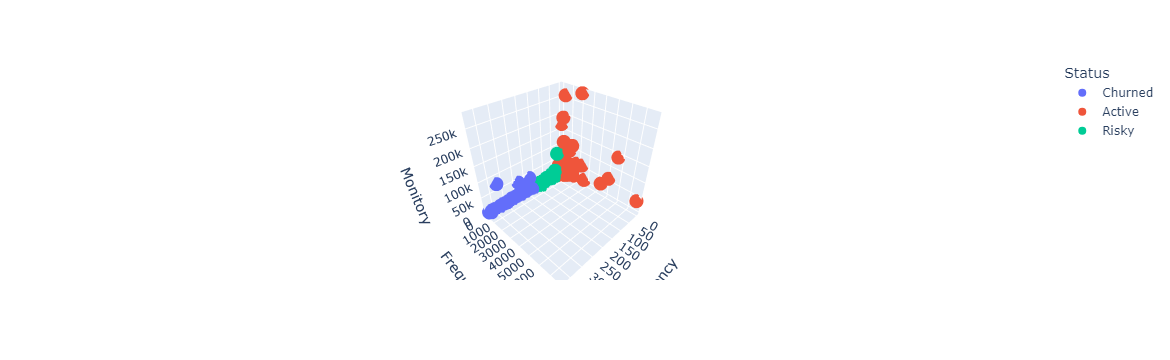

In [304]:
fig = px.scatter_3d(rfm_model,x = 'Recency', y = 'Frequency', z = 'Monitory',color = 'Status' )
fig.show()

In [305]:
df.shape

(392732, 11)

In [306]:
rfm_model.shape

(4339, 10)

## 4.	Create clusters using k means clustering algorithm.

In [307]:
model = rfm_model[['Frequency','Recency','Monitory']]

In [308]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Frequency  4339 non-null   int64  
 1   Recency    4339 non-null   int64  
 2   Monitory   4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


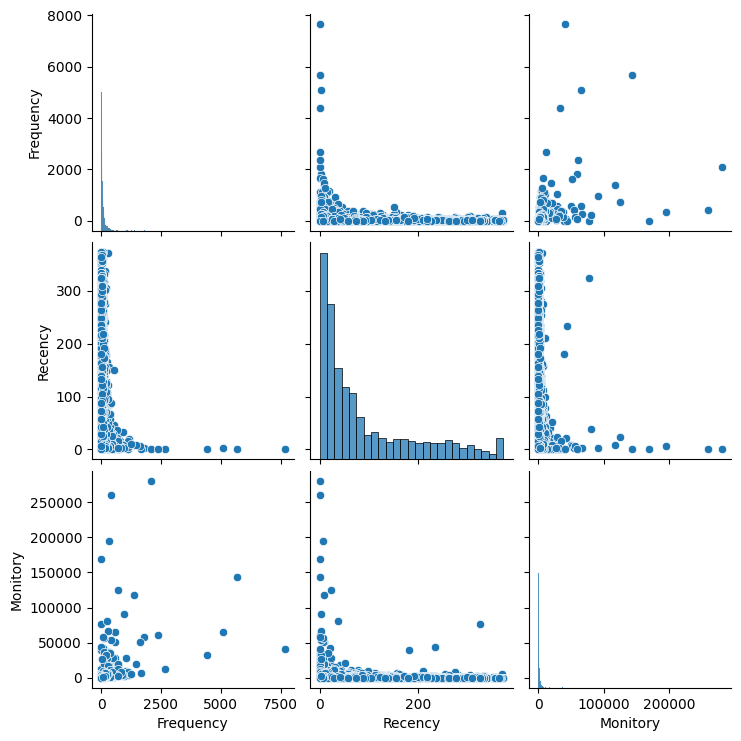

In [309]:
sns.pairplot(model)

## **K-Means Clustering

In [310]:
from sklearn.cluster import KMeans

In [311]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Frequency  4339 non-null   int64  
 1   Recency    4339 non-null   int64  
 2   Monitory   4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [312]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
model_std = st.fit_transform(model)

In [313]:
from sklearn.cluster import KMeans

In [314]:
Km = KMeans(n_clusters=3)

In [315]:
Km.fit(model_std)

KMeans(n_clusters=3)

In [316]:
clusters =Km.predict(model_std)

In [317]:
model['clusters']=clusters

In [318]:
model.head()

,Frequency,Recency,Monitory,clusters
CustomerID,,,,
12346.0,1,325,77183.60,0
12347.0,182,1,4310.00,1
12348.0,31,74,1797.24,1
12349.0,73,18,1757.55,1
12350.0,17,309,334.40,0


### Getting Cluster Centers 

In [319]:
(st.inverse_transform(Km.cluster_centers_)).round(2)

array([[2.7400000e+01, 2.4631000e+02, 6.3565000e+02],
       [1.0171000e+02, 4.0370000e+01, 2.0218600e+03],
       [2.5366200e+03, 3.6900000e+00, 1.2598134e+05]])

<function matplotlib.pyplot.show(close=None, block=None)>

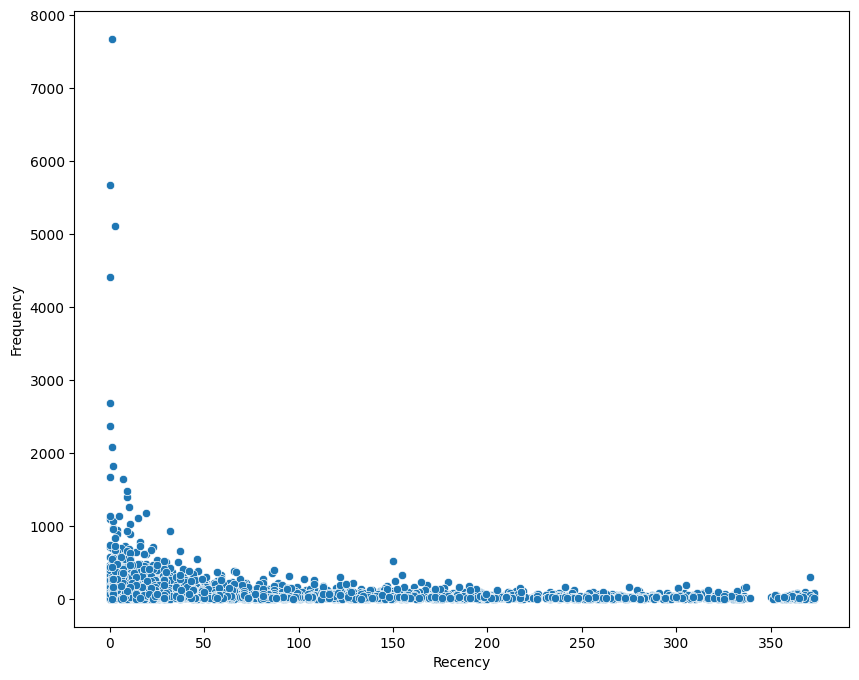

In [320]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=rfm_model, x='Recency',y='Frequency')
plt.show

In [321]:
model

,Frequency,Recency,Monitory,clusters
CustomerID,,,,
12346.0,1,325,77183.60,0
12347.0,182,1,4310.00,1
12348.0,31,74,1797.24,1
12349.0,73,18,1757.55,1
12350.0,17,309,334.40,0
...,...,...,...,...
18280.0,10,277,180.60,0
18281.0,7,180,80.82,0
18282.0,12,7,178.05,1


In [322]:
Km.inertia_# The total Variance of the model

5446.462744642124

## ** Finding the optimal Number of Clusters Using Elbow method and Silhouette Score

## **Elbow Method**

In [323]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(model_std)
    sse.append(km.inertia_)

In [324]:
sse

[13016.999999999998,
 8990.773641276195,
 5446.468298900822,
 4004.380113863853,
 2960.551232711667,
 2373.2298839906553,
 1925.8914910113417,
 1678.6281224669553,
 1500.8692948841872]

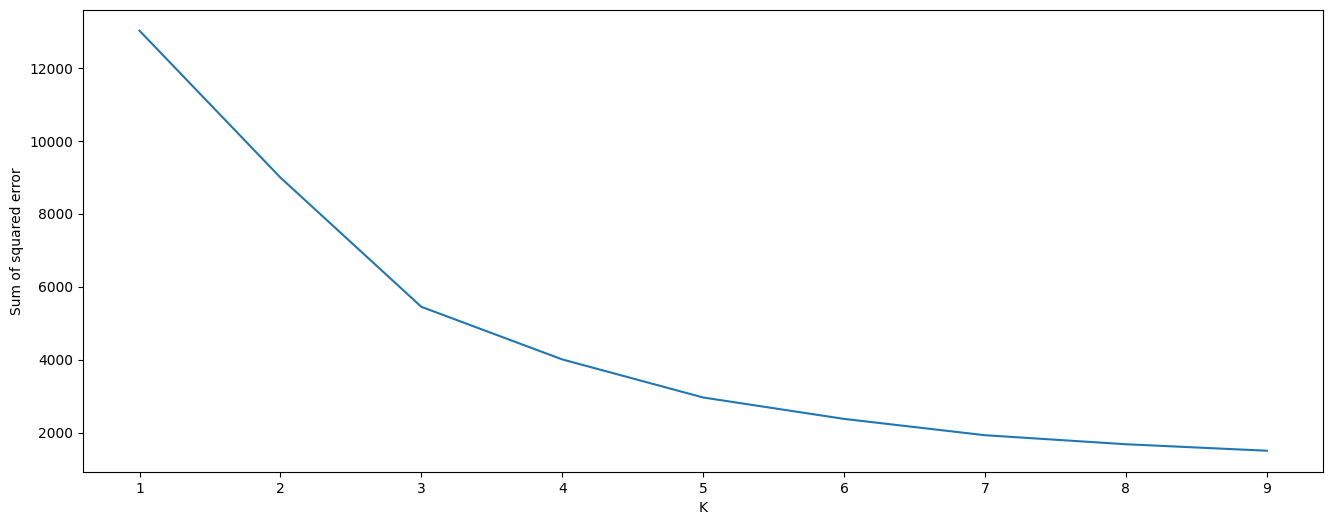

In [325]:
plt.figure(figsize=(16,6))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

### From Elbow method it is not clesr weather a drastic change in the sse occurs at clusters=3 or clusters=5 so we are trying Other methods 

## **Silhouette Score**



        *The Silhouette Score is a metric used to measure the quality of clusters in a clustering algorithm,   It quantifies how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 
        *The Silhouette Score ranges from -1 to 1, with higher values indicating that objects are well matched to their own clusters and poorly matched to neighboring clusters.

In [326]:
from sklearn.metrics import silhouette_score
ss=[]
for i in range(3,12):
    clModel = KMeans(n_clusters=i)
    clModel.fit(model_std)
    labels = clModel.predict(model_std)
    score = silhouette_score(model_std,labels)
    ss.append(score)

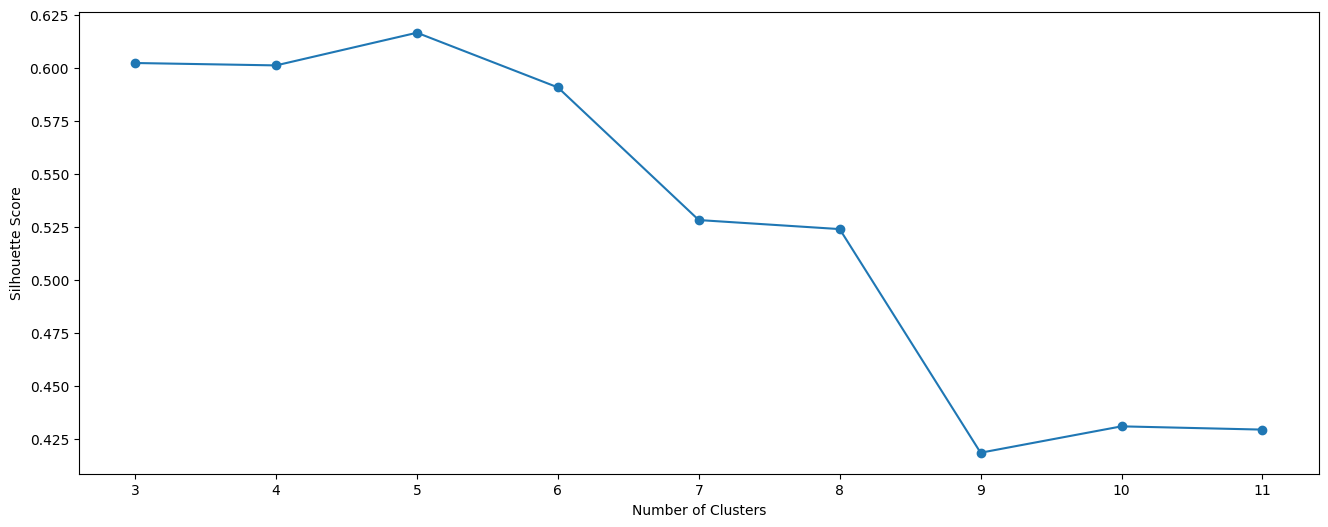

In [327]:
plt.figure(figsize=(16,6))
plt.plot(range(3,12),ss,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

### Hear we can find that the maximum Silhouette Score comes when we divide the data into 5 clusters , so that we have to redo the Clustering with 5 clusters 

## **Model 2

In [328]:
Km2 = KMeans(n_clusters=5)
Km2.fit(model_std)

KMeans(n_clusters=5)

In [329]:
clusters2 =Km2.predict(model_std)

In [330]:
model['clusters_2']=clusters2

In [331]:
model.head()

,Frequency,Recency,Monitory,clusters,clusters_2
CustomerID,,,,,
12346.0,1,325,77183.60,0,4
12347.0,182,1,4310.00,1,0
12348.0,31,74,1797.24,1,0
12349.0,73,18,1757.55,1,0
12350.0,17,309,334.40,0,1


#### Cluster Centers 

In [332]:
(st.inverse_transform(Km2.cluster_centers_))

array([[7.20442975e+01, 4.33431405e+01, 1.32829932e+03],
       [2.74075829e+01, 2.48476777e+02, 4.88761897e+02],
       [5.71800000e+03, 1.00000000e+00, 7.06122475e+04],
       [8.26833333e+02, 6.66666667e+00, 1.90808537e+05],
       [4.74096386e+02, 1.52530120e+01, 1.17516443e+04]])

 #### Inertia calculates the total distance between data points and their cluster center, with lower values indicating that the data points are closer to the center of their respective clusters.

In [333]:
print(f'Variance when data is Grouped into 3 clusters :{Km.inertia_}')
print(f'Variance when data is Grouped into 5 clusters : {Km2.inertia_}')

Variance when data is Grouped into 3 clusters :5446.462744642124
Variance when data is Grouped into 5 clusters : 2960.551232711667


In [227]:
Online_retail.shape

(1055, 23)

In [228]:
# exporting Data to work on tableau
Online_retail.to_csv('Online_retail.csv')

## *Visualize the Distribution of Clusters 

In [334]:
rfm_model['Clusters'] = clusters2 # adding Clusters to rfm data frame 
grpd= rfm_model.groupby('Clusters')

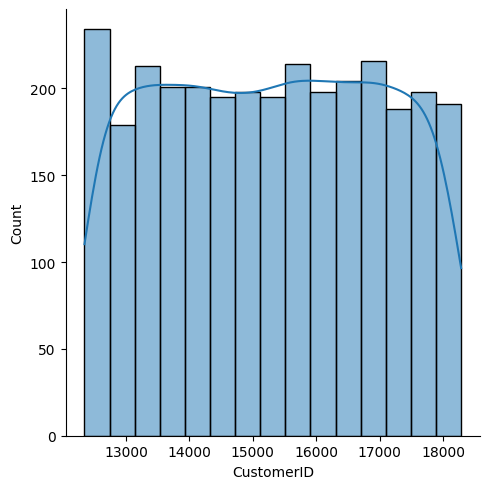

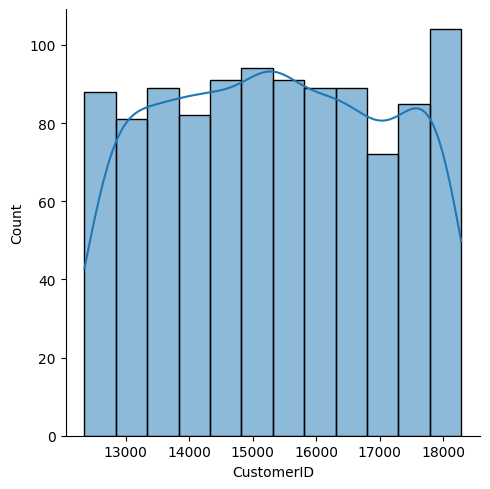

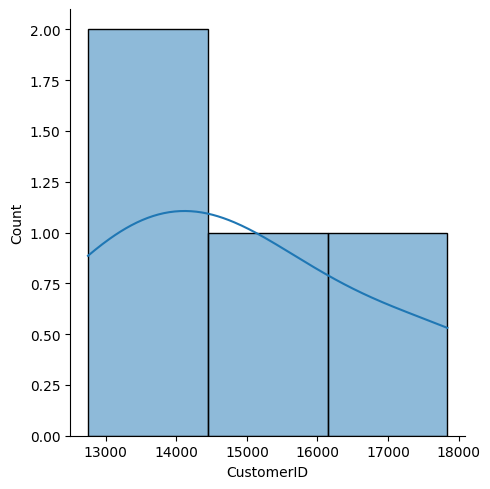

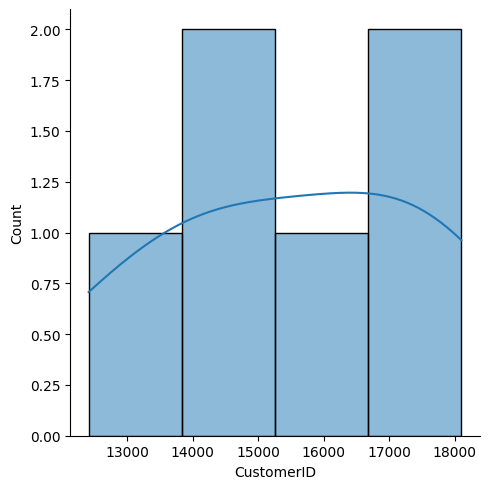

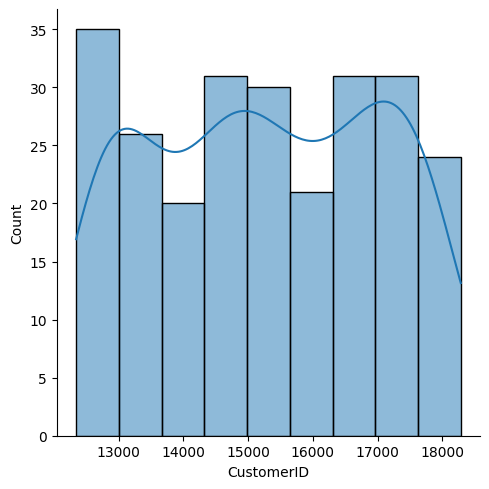

In [335]:
for i,df in grpd:
    sns.displot(data=df['Clusters'],x=df['Clusters'].index,kde=True)

In [337]:
rfm_model.shape

(4339, 11)

## *Apply Principal Component Analysis and Visualize the Results

      As there are three Features used for the clustering , we are reducing it to two features for the ease of Visualization

In [338]:
from sklearn.decomposition import PCA

In [339]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(model_std)
principal_comp

array([[ 4.04843153,  5.37752526],
       [ 0.79395536, -0.64557797],
       [-0.12203467, -0.21393347],
       ...,
       [-0.02026849, -0.90380731],
       [ 2.21549679, -0.32093868],
       [ 0.12511887, -0.47091234]])

In [340]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])

In [341]:
pca_df['Clusters'] = clusters2

In [342]:
pca_df

,pca1,pca2,Clusters
0,4.048432,5.377525,4
1,0.793955,-0.645578,0
2,-0.122035,-0.213933,0
3,0.225464,-0.688367,0
4,-1.216248,1.827138,1
...,...,...,...
4334,-1.118186,1.526772,1
4335,-0.741622,0.646356,1
4336,-0.020268,-0.903807,0
4337,2.215497,-0.320939,4


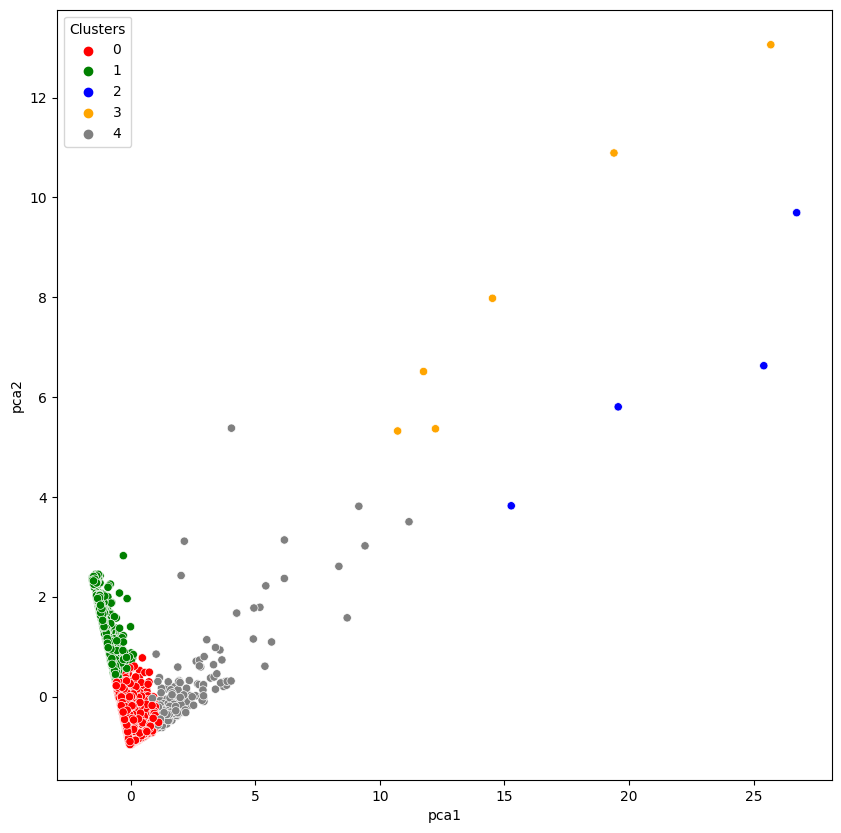

In [343]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "Clusters", data = pca_df, palette =['red','green','blue','orange','gray'])
plt.show()

For Further Reporting we have to take take this data to TABLEAU , For that we are joining the data together and exporting it as csv file 